In [325]:
# import modules
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from serialize import serialize
# silent warnings
import warnings; warnings.simplefilter('ignore')

SHOW_COLS = ['epa_area', 'dha_area', 'total_area', 'epa_mg', 'dha_mg', 'total_mg']

In [369]:
def stack_plot(data, step=1):
    N,M = data.shape
    fig = plt.figure(figsize = [16, 2*N], dpi=100)
    ax = fig.add_subplot(1,1,1)
    num_points = data.spec[0].shape[0]
    ppm_scale = np.linspace(12,-2,num_points)
    plt.xlim([12,-2])
    plt.yticks([])
    plots = [(ax.plot(ppm_scale, (data.loc[s]['spec']/data.loc[s]['spec'].max() + i*step)), ax.text(11.9,(i+0.05)*step,s)) 
             for (i,s) in enumerate(data.index)]
    plt.show()
    return

In [328]:
def plotspec(data, vzoom=100):
    fig = plt.figure(figsize = [15, 6])
    ax = fig.add_subplot(1,1,1)
    num_points = data.spec.shape[0]
    ppm_scale = np.linspace(12,-2,num_points)
    plt.xlim([12,-2])
    plt.ylim([data.spec.min(), data.spec.max()])
    plt.yticks([])
    ax.text(11.9,200,data.index)
    plots = [ax.plot(ppm_scale, (data.spec * m + i * 300)) for (i,m) in enumerate([1,vzoom])]
    plt.show()
    return

In [329]:
ppm_scale = np.linspace(12,-2,560)

In [330]:
xdf = serialize.read_dataframe('data\\us_no_comp\\X_us_no_full.bin', read_as='bin')
ydf = serialize.read_dataframe('data\\us_no_comp\\Y_us_no_full.csv', read_as='csv') 

xdf.shape, ydf.shape,xdf.columns, ydf.columns


((188, 2),
 (189, 8),
 Index(['Sample ID', 'spec'], dtype='object'),
 Index(['Sample ID', 'Sample', 'epa_area', 'dha_area', 'total_area', 'epa_mg',
        'dha_mg', 'total_mg'],
       dtype='object'))

Check Y matrix consistency and remove outlier

In [331]:
xdf.set_index('Sample ID', inplace=True)
ydf.set_index('Sample ID', inplace=True)

ydf = ydf.drop(ydf.index[~ydf.index.isin(xdf.index)])

ypdf.shape

(193, 8)

In [332]:
# concatenate and save full matrices
mdf = pd.concat([ydf,xdf], axis=1)
mdf.shape

(188, 8)

In [333]:
# save full XY data matrix
serialize.save_dataframe(mdf, 'data\\us_no_comp\\XY_us_no_full', save_as='bin')

In [334]:
# read previous results
rdf = serialize.read_dataframe('data\\us_no_comp\\us_no_results.csv', read_as='csv')

In [335]:
rdf.shape, rdf.columns

((188, 14),
 Index(['Unnamed: 0', 'Sample', 'epa_area', 'dha_area', 'total_area', 'epa_mg',
        'dha_mg', 'total_mg', 'epa_area.1', 'dha_area.1', 'total_area.1',
        'epa_mg.1', 'dha_mg.1', 'total_mg.1'],
       dtype='object'))

In [336]:
rdf['Unnamed: 0'].name = 'Sample ID'
rdf.columns

Index(['Unnamed: 0', 'Sample', 'epa_area', 'dha_area', 'total_area', 'epa_mg',
       'dha_mg', 'total_mg', 'epa_area.1', 'dha_area.1', 'total_area.1',
       'epa_mg.1', 'dha_mg.1', 'total_mg.1'],
      dtype='object')

In [337]:
rdf.rename({'Unnamed: 0':'Sample ID','epa_area.1':'epa_area_p', 'dha_area.1':'dha_area_p', 'total_area.1':'total_area_p',
       'epa_mg.1':'epa_mg_p', 'dha_mg.1':'dha_mg_p', 'total_mg.1':'total_mg_p'}, axis=1, inplace=True)
rdf.set_index('Sample ID', inplace=True)
rdf.head()

Sample  epa_area  dha_area  total_area  epa_mg  dha_mg  \
Sample ID                                                                
091213-A053-1D      53       6.3       0.7        11.3      57       6   
091859-A054-1D      54      34.7      24.5        69.1     321     230   
092127-A055-1D      55      21.7      12.3        40.9     188     109   
092353-A056-1D      56      34.1      26.8        70.7     316     252   
092649-A057-1D      57      34.3      26.5        70.6     318     250   

                total_mg  epa_area_p  dha_area_p  total_area_p    epa_mg_p  \
Sample ID                                                                    
091213-A053-1D       103    6.336177    0.519804     11.476221   59.208060   
091859-A054-1D       642   34.431389   24.543280     69.107678  313.655976   
092127-A055-1D       358   21.606395   12.149125     42.377537  185.693542   
092353-A056-1D       660   34.355648   26.802562     70.594488  314.214394   
092649-A057-1D       659   34.551142   26.339643     70.615259  314.674395   

                  dha_mg_p  total_mg_p  
Sample ID                               
091213-A053-1D    4.834667  107.764058  
091859-A054-1D  230.942536  637.353006  
092127-A055-1D  105.286892  366.876385  
092353-A056-1D  252.136339  651.204206  
092649-A057-1D  246.157179  648.843225

In [338]:
rdf.head()

Sample  epa_area  dha_area  total_area  epa_mg  dha_mg  \
Sample ID                                                                
091213-A053-1D      53       6.3       0.7        11.3      57       6   
091859-A054-1D      54      34.7      24.5        69.1     321     230   
092127-A055-1D      55      21.7      12.3        40.9     188     109   
092353-A056-1D      56      34.1      26.8        70.7     316     252   
092649-A057-1D      57      34.3      26.5        70.6     318     250   

                total_mg  epa_area_p  dha_area_p  total_area_p    epa_mg_p  \
Sample ID                                                                    
091213-A053-1D       103    6.336177    0.519804     11.476221   59.208060   
091859-A054-1D       642   34.431389   24.543280     69.107678  313.655976   
092127-A055-1D       358   21.606395   12.149125     42.377537  185.693542   
092353-A056-1D       660   34.355648   26.802562     70.594488  314.214394   
092649-A057-1D       659   34.551142   26.339643     70.615259  314.674395   

                  dha_mg_p  total_mg_p  
Sample ID                               
091213-A053-1D    4.834667  107.764058  
091859-A054-1D  230.942536  637.353006  
092127-A055-1D  105.286892  366.876385  
092353-A056-1D  252.136339  651.204206  
092649-A057-1D  246.157179  648.843225

In [339]:
epa = rdf.iloc[:,1].values
dha = rdf.iloc[:,2].values
tot = rdf.iloc[:,3].values

Text(0, 0.5, 'DHA area')

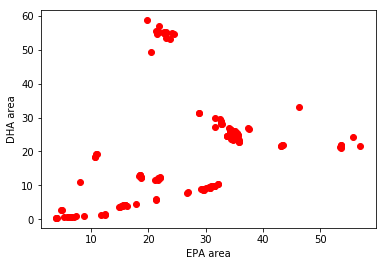

In [340]:
plt.plot(epa, dha, 'or')
plt.xlabel('EPA area')
plt.ylabel('DHA area')

Text(0, 0.5, 'EPA/Total')

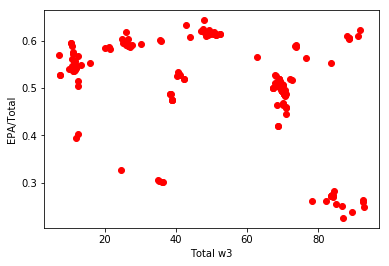

In [341]:
plt.plot(tot, epa/tot, 'or')
plt.xlabel('Total w3')
plt.ylabel('EPA/Total')

Text(0, 0.5, 'DHA/Total')

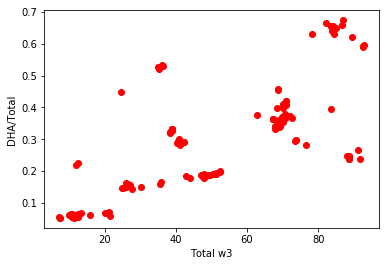

In [342]:
plt.plot(tot, dha/tot, 'or')
plt.xlabel('Total w3')
plt.ylabel('DHA/Total')

Text(0, 0.5, 'Other w3')

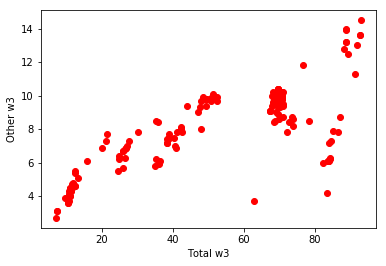

In [343]:
plt.plot(tot, tot-epa-dha, 'or')
plt.xlabel('Total w3')
plt.ylabel('Other w3')

Text(0, 0.5, 'Other/Total w3')

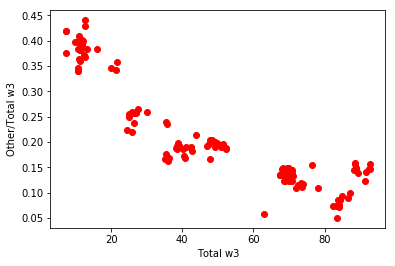

In [344]:
plt.plot(tot, (tot-epa-dha)/tot, 'or')
plt.xlabel('Total w3')
plt.ylabel('Other/Total w3')

## Stack plot all NMR spectra

In [345]:
rdf[np.abs(rdf.epa_area_p - rdf.epa_area) / rdf.epa_area > 0.05]

Sample  epa_area  dha_area  \
Sample ID                                                               
102233-A064-1D                                 64       6.2       0.7   
104828-A074-1D                                 74       6.3       0.7   
105359-A129                                   129      21.8      55.3   
105707-A079-1D                                 79       6.3       0.7   
112305-A087-1D                                 87      24.1      54.9   
114544-A091-1D                                 91      12.5       1.3   
115717-A093-1D                                 93      30.5       9.4   
120028-A095-1D                                 95       3.9       0.4   
120331-A097-1D                                 97       4.1       0.4   
121338-A101-1D                                101       5.3       0.6   
121714-A102-1D                                102       8.8       1.0   
122223-A104-1D                                104      11.7       1.4   
123224-A108-1D                                108      12.5       1.5   
131737-A130                                   130      23.1      55.2   
132054-A131                                   131      43.4      21.9   
132436-A132                                   132      37.5      26.7   
132802-A133                                   133      21.3      55.6   
133501-A135                                   135      20.4      49.3   
160613_MEG_3_4535_TS00007332                 7332      46.2      33.1   
161633-A116-1D                                116       6.3       0.7   
162044-A118-1D                                118      18.7      12.4   
162635-A122-1D                                122       6.3       0.7   
174801-A040-1D                                 40       6.0       0.6   
180632-A044-1D                                 44      11.0      19.3   
181113_reanalyse_A023_eg_-20181113-171601      23      23.1      54.8   
181113_reanalyse_A037_eg_-20181113-173245      37      14.9       3.7   
181113_reanalyse_A040_eg_-20181113-174926      40       5.9       0.6   
181113_reanalyse_A053_eg_-20181113-182821      53       6.2       0.6   
181113_reanalyse_A060_eg_-20181113-190820      60      35.4      25.4   
181155-A047-1D                                 47      10.9      19.3   
181205_STIG_074_RA_-20181205-113237            74       6.4       0.7   
181206_A087_EG_-20181206-111045                87      24.4      54.7   
181206_A125_EG_-20181206-130605               125       5.9       0.6   
181206_A132_EG_-20181206-125404               132      37.4      26.8   
181206_STIG_078_RA_-20181206-095651            78      15.9       4.2   
181206_STIG_079_RA_-20181206-101504            79       6.4       0.7   
181206_STIG_A_085 LHS-20181206-105709          85       6.4       0.7   
181603-A049-1D                                 49      21.6      54.7   
181726-A050-1D                                 50      28.9      31.4   
181854-A051-1D                                 51      10.7      18.4   

                                           total_area  epa_mg  dha_mg  \
Sample ID                                                               
102233-A064-1D                                   11.4      56       6   
104828-A074-1D                                   12.5      58       7   
105359-A129                                      85.0     183     478   
105707-A079-1D                                   10.6      58       6   
112305-A087-1D                                   92.6     231     528   
114544-A091-1D                                   21.5     116      12   
115717-A093-1D                                   49.7     279      87   
120028-A095-1D                                    7.4      35       4   
120331-A097-1D                                    7.2      37       4   
121338-A101-1D                                    9.8      48       5   
121714-A102-1D                                   15.9      80       9   
122223-A104-1D             

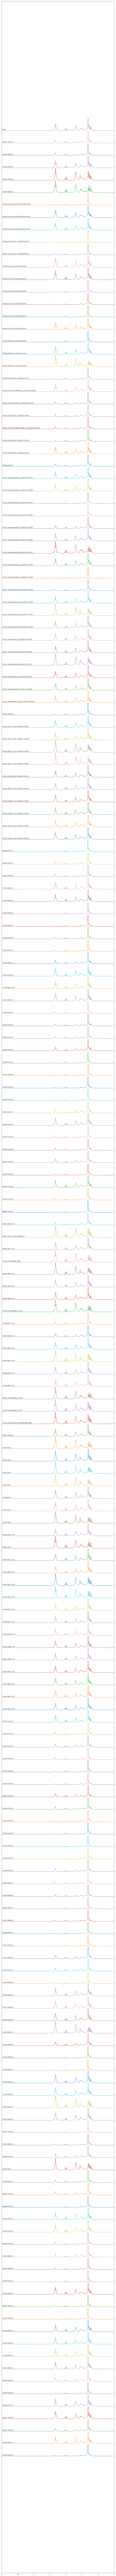

In [371]:
stack_plot(mdf)

## Low Total n3 (total_area < 11%)

In [347]:
subset = mdf[mdf.total_area <= 11]
subset[SHOW_COLS]

epa_area  dha_area  total_area  \
105707-A079-1D                                  6.3       0.7        10.6   
120028-A095-1D                                  3.9       0.4         7.4   
120331-A097-1D                                  4.1       0.4         7.2   
121338-A101-1D                                  5.3       0.6         9.8   
161633-A116-1D                                  6.3       0.7        10.6   
162635-A122-1D                                  6.3       0.7        10.7   
174801-A040-1D                                  6.0       0.6        10.7   
181113_reanalyse_A040_eg_-20181113-174926       5.9       0.6        11.0   
181113_reanalyse_A058_eg_-20181113-183257       6.3       0.7        11.0   
181206_A095_EG_-20181206-133445                 3.9       0.4         7.4   
181206_A125_EG_-20181206-130605                 5.9       0.6        10.8   

                                           epa_mg  dha_mg  total_mg  
105707-A079-1D                               58.0     6.0      98.0  
120028-A095-1D                               35.0     4.0      67.0  
120331-A097-1D                               37.0     4.0      65.0  
121338-A101-1D                               48.0     5.0      88.0  
161633-A116-1D                               57.0     6.0      96.0  
162635-A122-1D                               57.0     6.0      98.0  
174801-A040-1D                               54.0     6.0      98.0  
181113_reanalyse_A040_eg_-20181113-174926    54.0     6.0     101.0  
181113_reanalyse_A058_eg_-20181113-183257    58.0     6.0     101.0  
181206_A095_EG_-20181206-133445              35.0     4.0      66.0  
181206_A125_EG_-20181206-130605              54.0     6.0      99.0

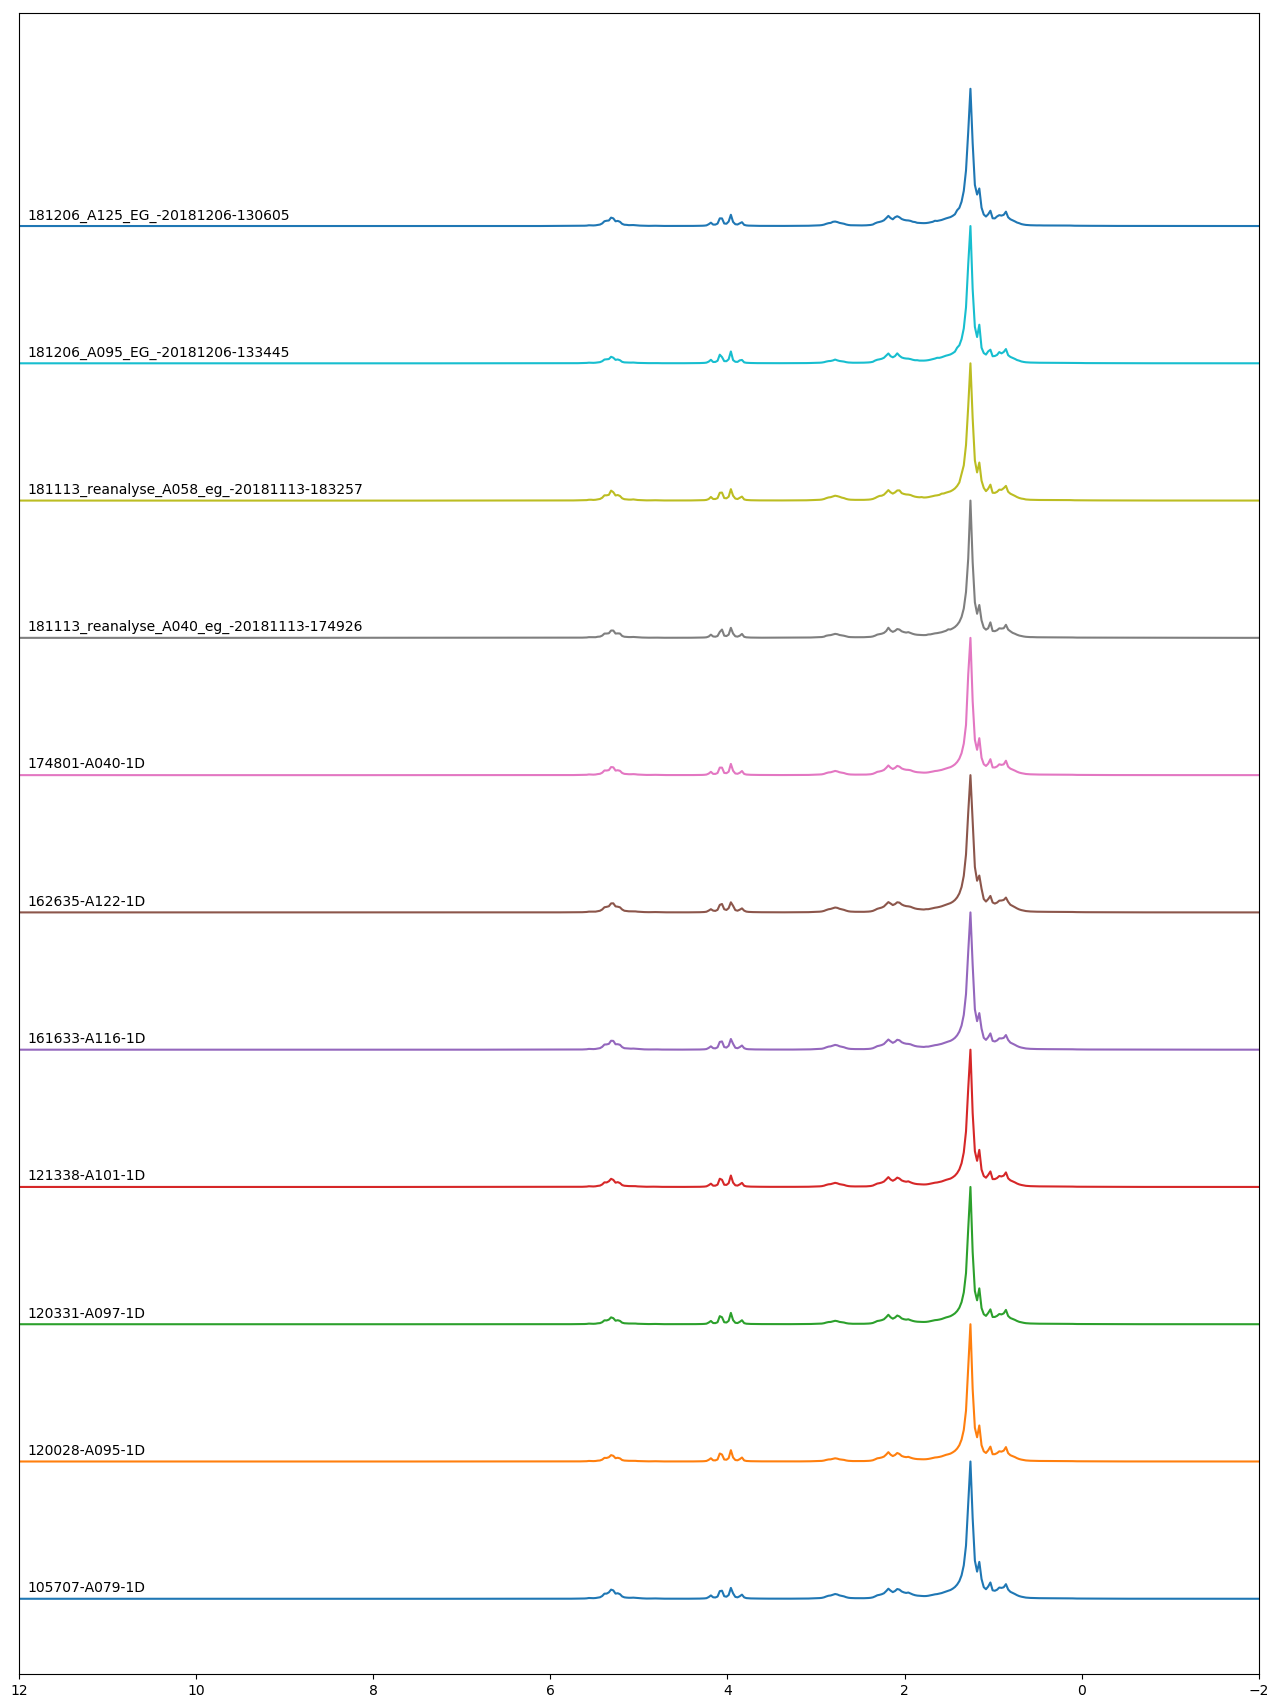

In [348]:
stack_plot(subset)

## High Total n3 (total_area > 80%)

In [349]:
subset = mdf[mdf.total_area > 80]
subset[SHOW_COLS]

epa_area  dha_area  total_area  \
105359-A129                                    21.8      55.3        85.0   
110520-A081-1D                                 23.1      53.6        83.9   
112305-A087-1D                                 24.1      54.9        92.6   
125432-A014_2-1D                               21.8      57.0        86.6   
125647-A015_2-1D                               22.7      55.1        84.1   
130043-3148                                    53.7      21.9        88.8   
131737-A130                                    23.1      55.2        92.8   
132802-A133                                    21.3      55.6        89.4   
133112-A134                                    19.7      58.7        87.1   
133844-A136                                    53.7      21.9        88.8   
154050_PP_500200EE_Eu_1918                     55.7      24.3        91.3   
154858-A023-2-1D                               23.1      54.8        84.0   
155946_PP_500200EE_Eu_1919                     57.0      21.7        91.7   
160246-A030-2-1D                               23.8      53.3        84.4   
160301_PP_500200EE_2809                        53.7      21.7        88.2   
160613_MEG_3_4535_TS00007332                   46.2      33.1        83.5   
181014_A#015_1_EH_-20181014-145806             22.7      54.8        83.6   
181014_A#015_2_EH_-20181014-145959             22.7      54.8        83.6   
181112_reanalyse_015_eg_-20181112-111201       22.7      54.8        83.6   
181113_reanalyse_A023_eg_-20181113-171601      23.1      54.8        84.1   
181113_reanalyse_A048_eg_-20181113-180227      53.5      21.2        88.6   
181206_A087_EG_-20181206-111045                24.4      54.7        92.7   
181320-A048-1D                                 53.7      21.0        88.7   
181603-A049-1D                                 21.6      54.7        82.3   

                                           epa_mg  dha_mg  total_mg  
105359-A129                                 183.0   478.0     728.0  
110520-A081-1D                              225.0   525.0     820.0  
112305-A087-1D                              231.0   528.0     890.0  
125432-A014_2-1D                            193.0   520.0     784.0  
125647-A015_2-1D                            204.0   510.0     770.0  
130043-3148                                 516.0   217.0     861.0  
131737-A130                                 219.0   535.0     893.0  
132802-A133                                 183.0   495.0     788.0  
133112-A134                                 159.0   487.0     716.0  
133844-A136                                 516.0   217.0     861.0  
154050_PP_500200EE_Eu_1918                  537.0   243.0     889.0  
154858-A023-2-1D                            206.0   500.0     762.0  
155946_PP_500200EE_Eu_1919                  528.0   209.0     858.0  
160246-A030-2-1D                            226.0   519.0     816.0  
160301_PP_500200EE_2809                     516.0   209.0     856.0  
160613_MEG_3_4535_TS00007332                433.0   322.0     794.0  
181014_A#015_1_EH_-20181014-145806          204.0   507.0     768.0  
181014_A#015_2_EH_-20181014-145959          204.0   507.0     768.0  
181112_reanalyse_015_eg_-20181112-111201    204.0   507.0     768.0  
181113_reanalyse_A023_eg_-20181113-171601   206.0   501.0     763.0  
181113_reanalyse_A048_eg_-20181113-180227   516.0   210.0     862.0  
181206_A087_EG_-20181206-111045             232.0   531.0     894.0  
181320-A048-1D                              513.0   208.0     855.0  
181603-A049-1D                              189.0   492.0     733.0

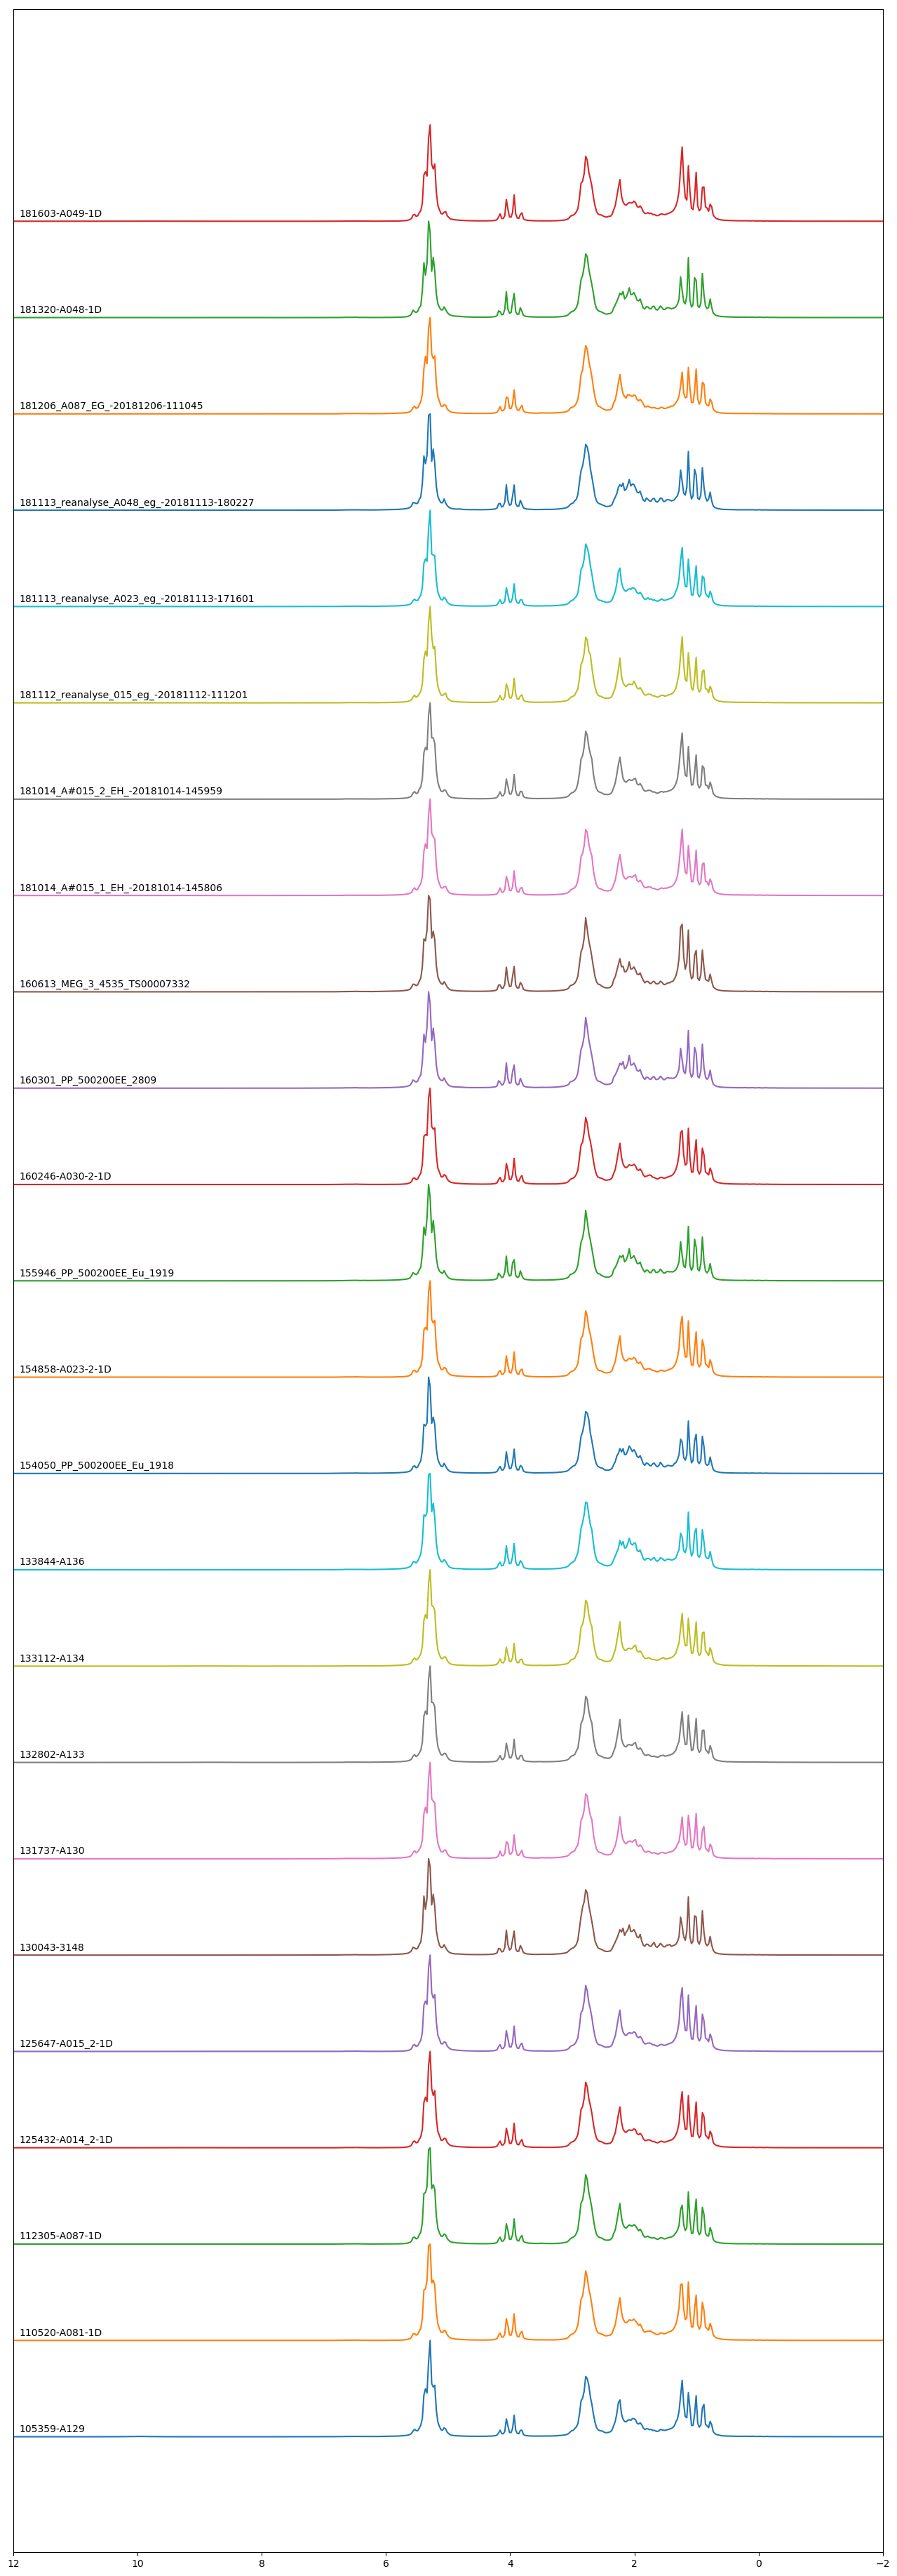

In [350]:
stack_plot(subset)

## High EPA (epa_area > 50%)

In [351]:
subset = mdf[mdf.epa_area > 50]
subset[SHOW_COLS]

epa_area  dha_area  total_area  \
130043-3148                                    53.7      21.9        88.8   
133844-A136                                    53.7      21.9        88.8   
154050_PP_500200EE_Eu_1918                     55.7      24.3        91.3   
155946_PP_500200EE_Eu_1919                     57.0      21.7        91.7   
160301_PP_500200EE_2809                        53.7      21.7        88.2   
181113_reanalyse_A048_eg_-20181113-180227      53.5      21.2        88.6   
181320-A048-1D                                 53.7      21.0        88.7   

                                           epa_mg  dha_mg  total_mg  
130043-3148                                 516.0   217.0     861.0  
133844-A136                                 516.0   217.0     861.0  
154050_PP_500200EE_Eu_1918                  537.0   243.0     889.0  
155946_PP_500200EE_Eu_1919                  528.0   209.0     858.0  
160301_PP_500200EE_2809                     516.0   209.0     856.0  
181113_reanalyse_A048_eg_-20181113-180227   516.0   210.0     862.0  
181320-A048-1D                              513.0   208.0     855.0

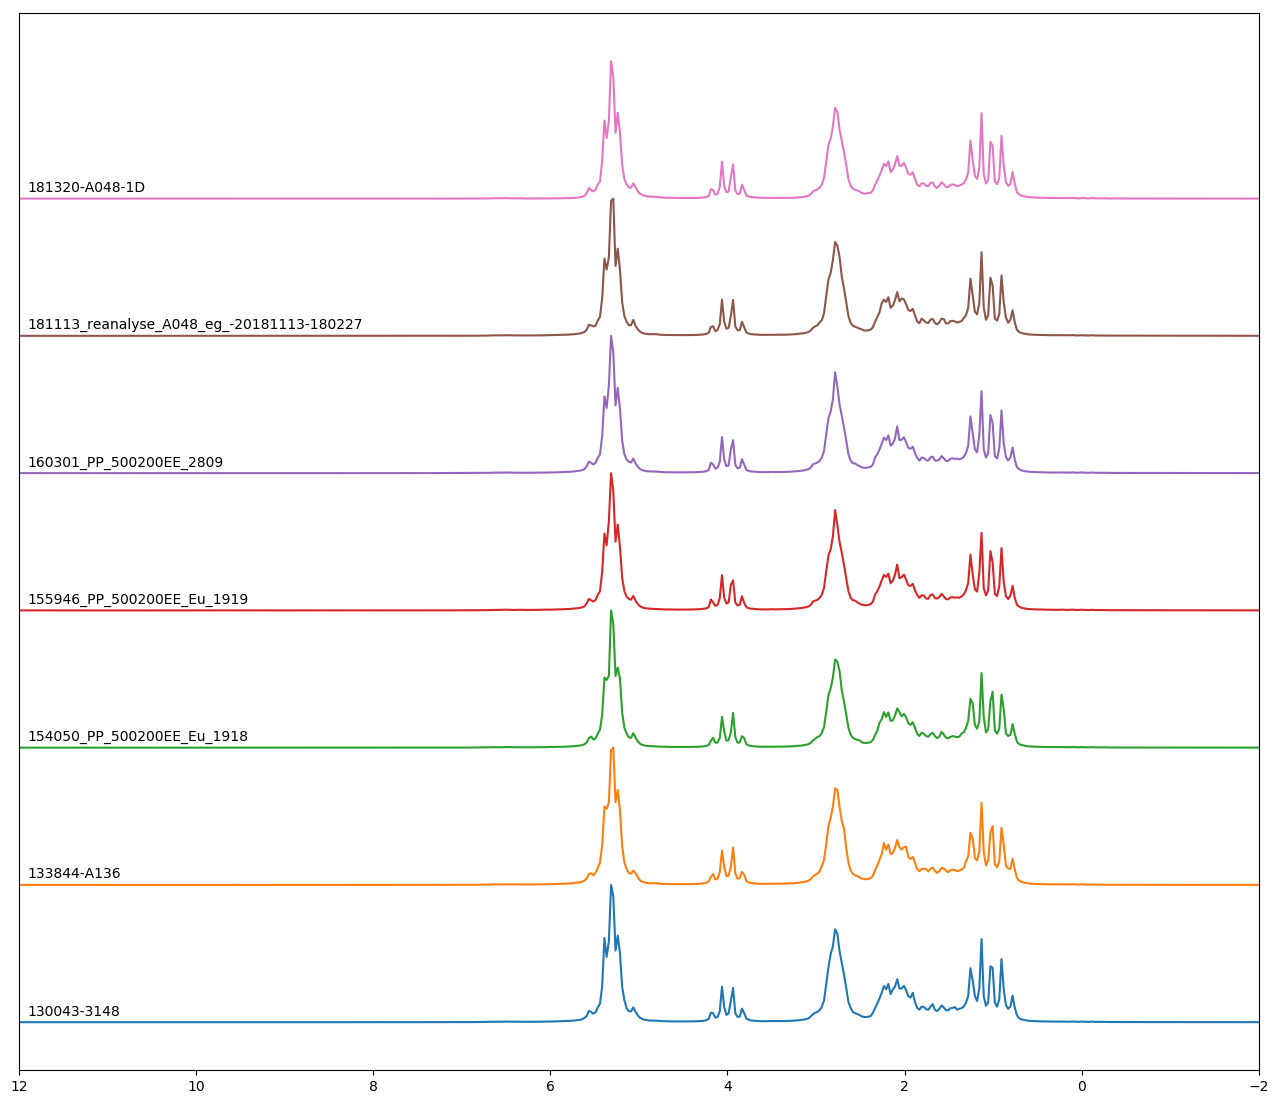

In [352]:
stack_plot(subset)

## High DHA (dha_area > 50%)

In [353]:
subset = mdf[mdf.dha_area > 50]
subset[SHOW_COLS]

epa_area  dha_area  total_area  \
105359-A129                                    21.8      55.3        85.0   
110520-A081-1D                                 23.1      53.6        83.9   
112305-A087-1D                                 24.1      54.9        92.6   
125432-A014_2-1D                               21.8      57.0        86.6   
125647-A015_2-1D                               22.7      55.1        84.1   
131737-A130                                    23.1      55.2        92.8   
132802-A133                                    21.3      55.6        89.4   
133112-A134                                    19.7      58.7        87.1   
154858-A023-2-1D                               23.1      54.8        84.0   
160246-A030-2-1D                               23.8      53.3        84.4   
181014_A#015_1_EH_-20181014-145806             22.7      54.8        83.6   
181014_A#015_2_EH_-20181014-145959             22.7      54.8        83.6   
181112_reanalyse_015_eg_-20181112-111201       22.7      54.8        83.6   
181113_reanalyse_A023_eg_-20181113-171601      23.1      54.8        84.1   
181206_A087_EG_-20181206-111045                24.4      54.7        92.7   
181603-A049-1D                                 21.6      54.7        82.3   

                                           epa_mg  dha_mg  total_mg  
105359-A129                                 183.0   478.0     728.0  
110520-A081-1D                              225.0   525.0     820.0  
112305-A087-1D                              231.0   528.0     890.0  
125432-A014_2-1D                            193.0   520.0     784.0  
125647-A015_2-1D                            204.0   510.0     770.0  
131737-A130                                 219.0   535.0     893.0  
132802-A133                                 183.0   495.0     788.0  
133112-A134                                 159.0   487.0     716.0  
154858-A023-2-1D                            206.0   500.0     762.0  
160246-A030-2-1D                            226.0   519.0     816.0  
181014_A#015_1_EH_-20181014-145806          204.0   507.0     768.0  
181014_A#015_2_EH_-20181014-145959          204.0   507.0     768.0  
181112_reanalyse_015_eg_-20181112-111201    204.0   507.0     768.0  
181113_reanalyse_A023_eg_-20181113-171601   206.0   501.0     763.0  
181206_A087_EG_-20181206-111045             232.0   531.0     894.0  
181603-A049-1D                              189.0   492.0     733.0

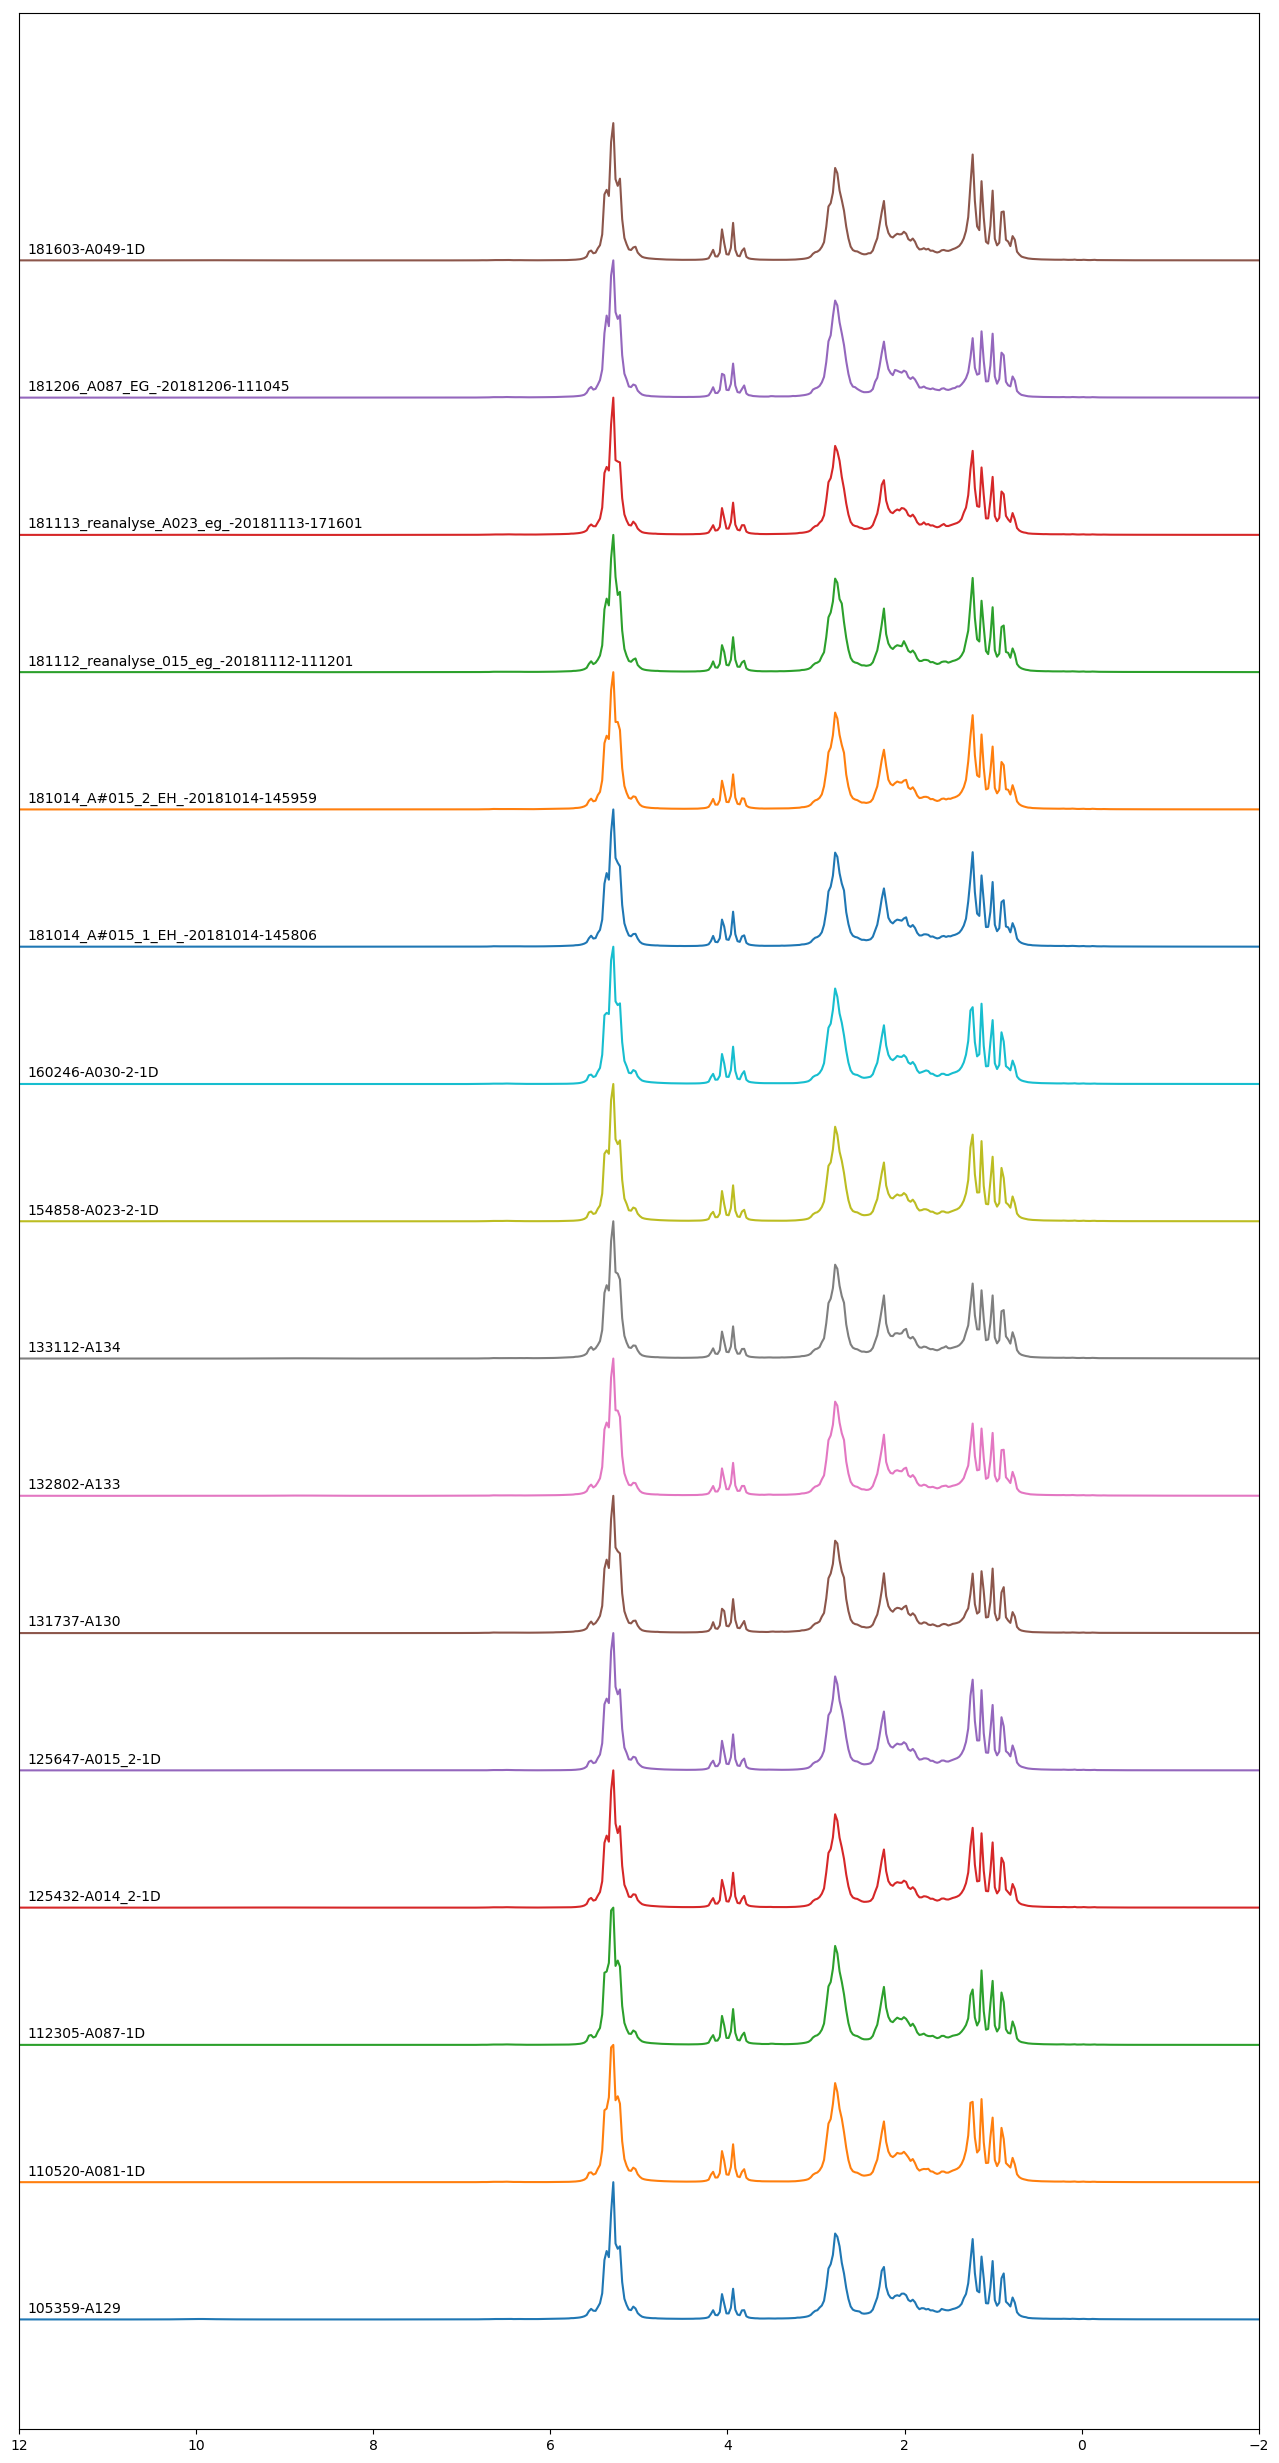

In [354]:
stack_plot(subset)

## Very low EPA and DHA (epa_area < 6 and dha_area < 1)

In [355]:
subset = mdf[(mdf.epa_area < 6) & (mdf.dha_area < 1)]
subset[SHOW_COLS]

epa_area  dha_area  total_area  \
120028-A095-1D                                  3.9       0.4         7.4   
120331-A097-1D                                  4.1       0.4         7.2   
121338-A101-1D                                  5.3       0.6         9.8   
181113_reanalyse_A040_eg_-20181113-174926       5.9       0.6        11.0   
181206_A095_EG_-20181206-133445                 3.9       0.4         7.4   
181206_A125_EG_-20181206-130605                 5.9       0.6        10.8   

                                           epa_mg  dha_mg  total_mg  
120028-A095-1D                               35.0     4.0      67.0  
120331-A097-1D                               37.0     4.0      65.0  
121338-A101-1D                               48.0     5.0      88.0  
181113_reanalyse_A040_eg_-20181113-174926    54.0     6.0     101.0  
181206_A095_EG_-20181206-133445              35.0     4.0      66.0  
181206_A125_EG_-20181206-130605              54.0     6.0      99.0

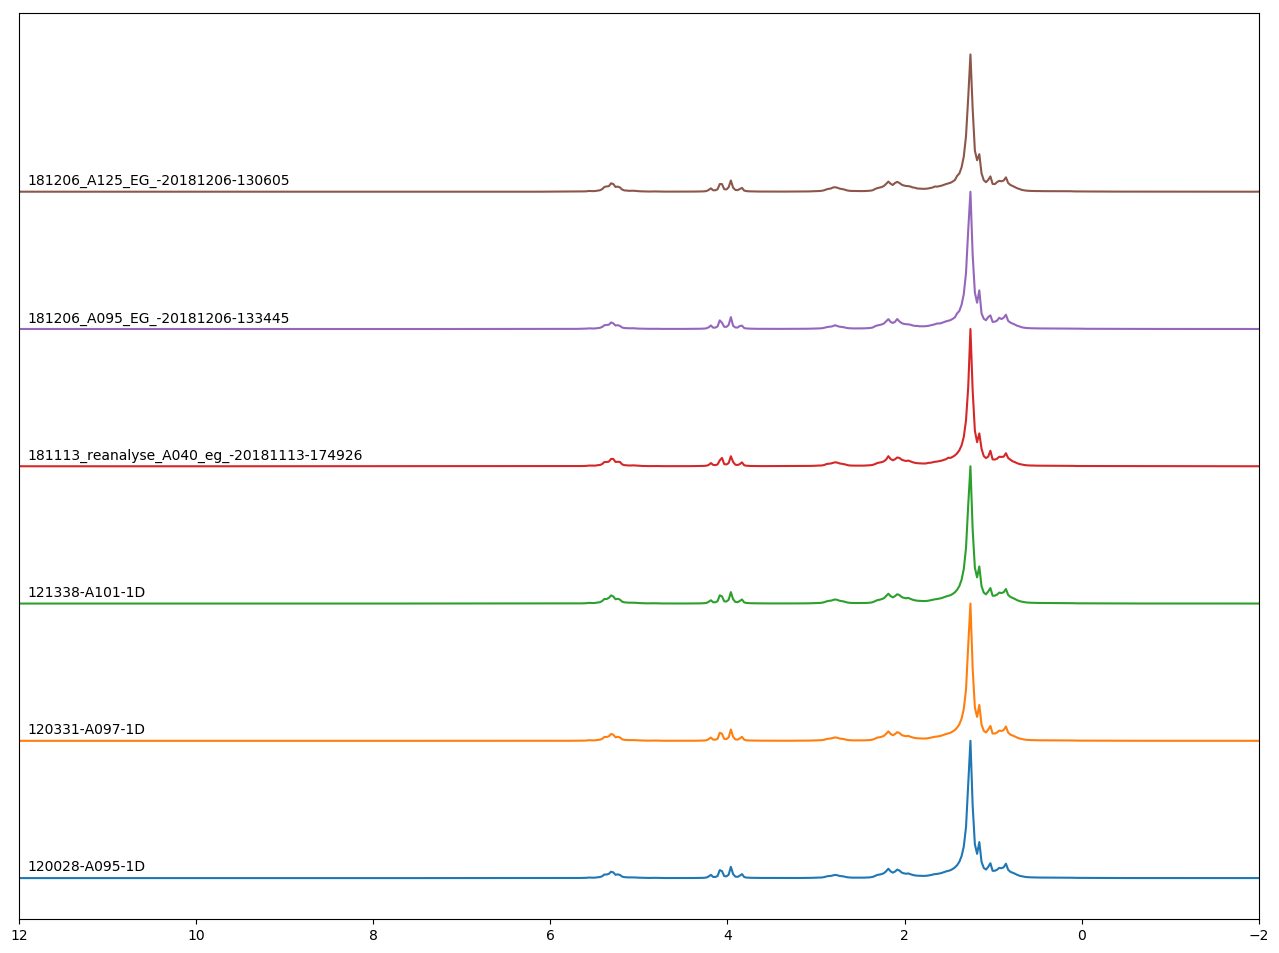

In [356]:
stack_plot(subset)

## Mid percentage EPA and DHA on high Total n3

In [357]:
subset = mdf[(mdf.epa_area < 35) & (mdf.dha_area > 25) & (mdf.dha_area < 30)]
subset[SHOW_COLS]

epa_area  dha_area  total_area  \
092353-A056-1D                                   34.1      26.8        70.7   
092649-A057-1D                                   34.3      26.5        70.6   
101302-A060-1D                                   34.6      25.4        69.7   
101550-A061-1D                                   34.6      25.9        70.2   
102039-A063-1D                                   34.7      26.0        70.5   
102752-A066-1D                                   34.5      26.2        70.9   
104458-A072-1D                                   34.4      26.2        70.5   
104710-A073-1D                                   34.7      26.0        70.5   
105831-A080-1D                                   34.6      26.0        70.5   
111253-A082-1D                                   32.6      28.1        70.1   
111458-A083-1D                                   32.5      29.7        70.9   
112449-A088-1D                                   34.3      26.1        70.3   
112612-A089-1D                                   34.4      25.4        69.8   
113356-A090-1D                                   31.6      29.9        71.0   
123752-A112-1D                                   34.5      25.9        70.6   
125258-A013_2-1D                                 31.7      27.1        68.3   
161507-A113-1D                                   34.4      26.0        70.3   
171927-A034-1D                                   32.6      28.8        70.0   
172953-A035-1D                                   32.6      28.9        70.9   
181113_reanalyse_A063_eg_-20181113-191317        34.6      26.0        70.5   
181205_STIG_066_RA_-20181205-105351              34.3      26.3        70.6   
181205_STIG_072_CORRECT_RA_-20181205-112808      34.3      26.3        70.6   
181206_A088_EG_-20181206-111552                  34.4      26.0        70.5   
181206_A112_EG_-20181206-132352                  34.6      25.8        69.7   
181206_STIG_A_080 LHS-20181206-103144            34.3      26.1        70.3   
181206_STIG_A_082 LHS-20181206-104022            32.8      28.0        70.1   

                                             epa_mg  dha_mg  total_mg  
092353-A056-1D                                316.0   252.0     660.0  
092649-A057-1D                                318.0   250.0     659.0  
101302-A060-1D                                313.0   236.0     639.0  
101550-A061-1D                                311.0   240.0     640.0  
102039-A063-1D                                316.0   243.0     650.0  
102752-A066-1D                                316.0   245.0     655.0  
104458-A072-1D                                315.0   244.0     652.0  
104710-A073-1D                                317.0   244.0     652.0  
105831-A080-1D                                317.0   246.0     654.0  
111253-A082-1D                                281.0   244.0     606.0  
111458-A083-1D                                276.0   254.0     605.0  
112449-A088-1D                                315.0   242.0     649.0  
112612-A089-1D                                312.0   234.0     638.0  
113356-A090-1D                                266.0   254.0     600.0  
123752-A112-1D                                315.0   240.0     648.0  
125258-A013_2-1D                              269.0   237.0     589.0  
161507-A113-1D                                314.0   241.0     647.0  
171927-A034-1D                                283.0   254.0     611.0  
172953-A035-1D                                281.0   253.0     615.0  
181113_reanalyse_A063_eg_-20181113-191317     317.0   244.0     653.0  
181205_STIG_066_RA_-20181205-105351           316.0   246.0     653.0  
181205_STIG_072_CORRECT_RA_-20181205-112808   316.0   246.0     653.0  
181206_A088_EG_-20181206-111552               313.0   241.0     647.0  
181206_A112_EG_-20181206-132352               315.0   240.0     640.0  
181206_STIG_A_080 LHS-20181206-103144         317.0   245.0     653.0  
181206_STIG_A_082 LHS-20181206-104022  

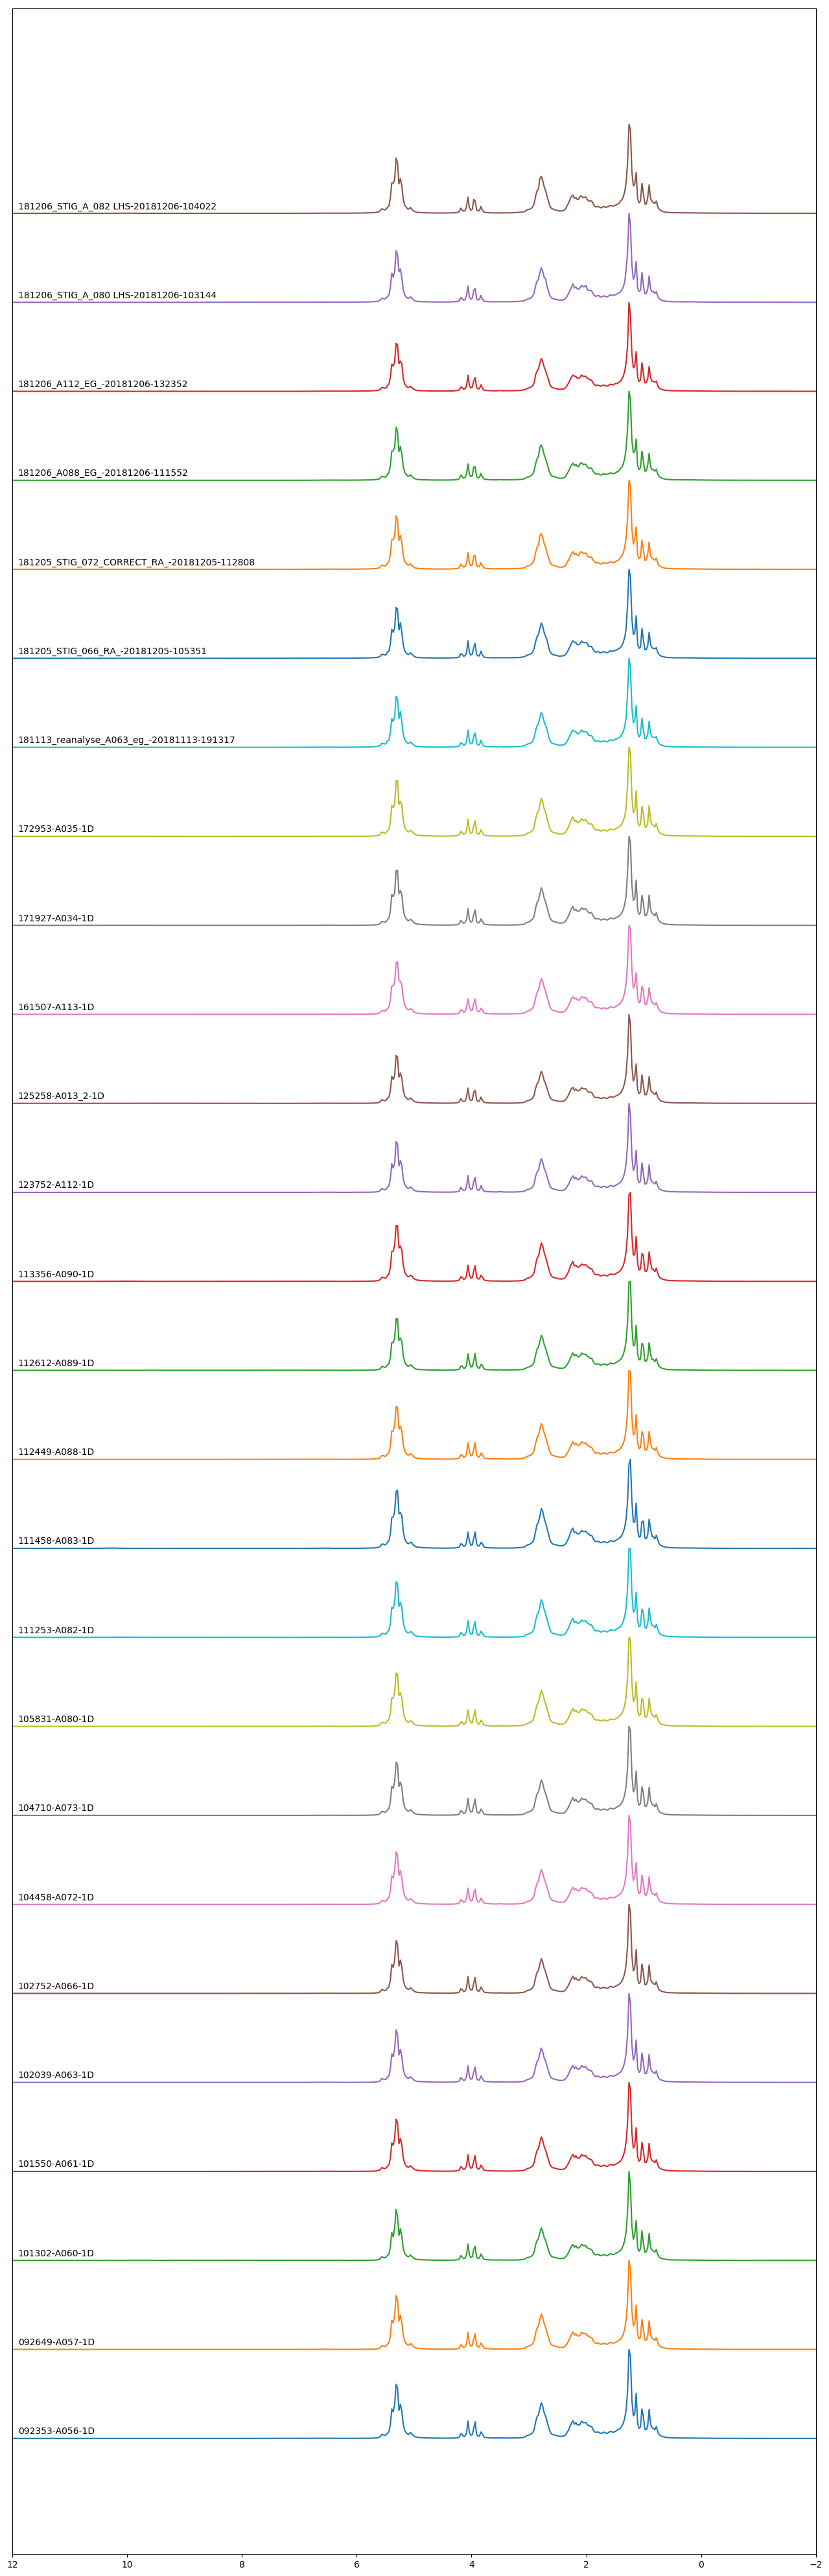

In [358]:
stack_plot(subset)

## Lowest and Highest Total w3 NMR spectra

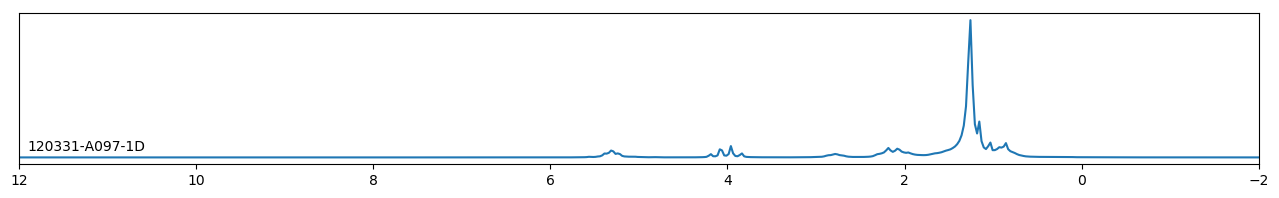

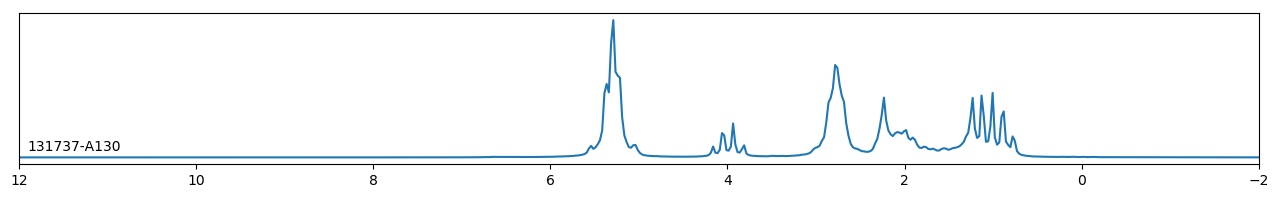

In [359]:
# lowest w3 
stack_plot(mdf[mdf.total_area == mdf.total_area.min()])
stack_plot(mdf[mdf.total_area == mdf.total_area.max()])

## Modeling low w3 levels
First we need to create the X and Y matrices including only samples with low levels of EPA and DHA. We need to get as many samles as possible, let's find out how many we have in each tier.

In [386]:
low3 = mdf[(mdf.epa_area <= 20) & (mdf.dha_area <= 20)]
low3.describe()

Sample   epa_area   dha_area  total_area      epa_mg      dha_mg  \
count   60.000000  60.000000  60.000000   60.000000   60.000000   60.000000   
mean    81.250000   9.981667   4.183333   19.610000   89.433333   38.316667   
std     29.535744   4.990720   5.586975   10.626298   43.090904   51.611158   
min     32.000000   3.900000   0.400000    7.200000   35.000000    4.000000   
25%     56.750000   6.300000   0.700000   11.300000   57.000000    6.000000   
50%     79.000000   6.500000   0.850000   12.500000   58.500000    8.000000   
75%    104.750000  15.350000   4.125000   26.825000  137.500000   38.000000   
max    128.000000  18.800000  19.300000   39.000000  162.000000  185.000000   

         total_mg  
count   60.000000  
mean   177.166667  
std     94.064919  
min     65.000000  
25%    103.000000  
50%    113.500000  
75%    242.500000  
max    344.000000

In [387]:
low3[SHOW_COLS]

epa_area  dha_area  \
091213-A053-1D                                          6.3       0.7   
092816-A058-1D                                          6.4       0.7   
102233-A064-1D                                          6.2       0.7   
102457-A065-1D                                         15.6       4.1   
103109-A067-1D                                          6.3       0.7   
104209-A070-1D                                         18.4      12.7   
104828-A074-1D                                          6.3       0.7   
105542-A078-1D                                         15.8       4.1   
105707-A079-1D                                          6.3       0.7   
111716-A084-1D                                          6.5       0.7   
111839-A085-1D                                          6.5       0.7   
114544-A091-1D                                         12.5       1.3   
115912-A094-1D                                          6.0       0.7   
120028-A095-1D                                          3.9       0.4   
120217-A096-1D                                         16.3       4.0   
120331-A097-1D                                          4.1       0.4   
120459-A098-1D                                         17.9       4.5   
121338-A101-1D                                          5.3       0.6   
121714-A102-1D                                          8.8       1.0   
122105-A103-1D                                          7.1       0.8   
122223-A104-1D                                         11.7       1.4   
123100-A107-1D                                          7.3       0.9   
123224-A108-1D                                         12.5       1.5   
160621-A032-2-1D                                       10.7      18.5   
160850-A114-1D                                          6.4       0.7   
161221-A115-1D                                         15.9       4.1   
161633-A116-1D                                          6.3       0.7   
162044-A118-1D                                         18.7      12.4   
162635-A122-1D                                          6.3       0.7   
163303-A123-1D                                          6.1       0.7   
163416-A124-1D                                         15.3       3.9   
163528-A125-1D                                          6.2       0.7   
163812-A127-1D                                         18.7      12.3   
163923-A128-1D                                         18.8      12.5   
171633-A033-1D                                          8.0      11.0   
173822-A037-1D                                         15.0       3.7   
174046-A038-1D                                         15.5       3.9   
174304-A039-1D                                          6.3       0.7   
174801-A040-1D                                          6.0       0.6   
180632-A044-1D                                         11.0      19.3   
180828-A045-1D                                          4.7       2.6   
181034-A046-1D                                          5.0       2.8   
181113_reanalyse_A037_eg_-20181113-173245              14.9       3.7   
181113_reanalyse_A040_eg_-20181113-174926               5.9       0.6   
181113_reanalyse_A053_eg_-20181113-182821               6.2       0.6   
181113_reanalyse_A058_eg_-20181113-183257               6.3       0.7   
181155-A047-1D                                         10.9      19.3   
181205_STIG_068_RA_-20181205-105934                    16.0       4.2   
181205_STIG_070_CORRECT_FINAL_RA_-20181205-135354      18.5      13.0   
181205_STIG_070_RA_-20181205-110953                    18.5      13.0   
181205_STIG_070_RETEST_A_-20181205-111120              18.5      13.0   
181205_STIG_074_RA_-20181205-113237                     6.4       0.7   
181206_A095_EG_-20181206-133445                         3.9       0.4   
181206_A114_EG_-20181206-131924                         6.4       0.7   
181206_A122_EG_-20181206-131352     

Text(0, 0.5, 'DHA (area%)')

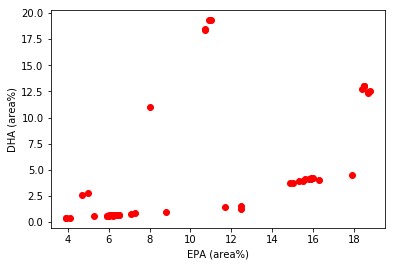

In [388]:
plt.plot(subset.epa_area, subset.dha_area, 'or')
plt.xlabel('EPA (area%)')
plt.ylabel('DHA (area%)')

In [390]:
import pls
PROPS = ['epa_area', 'dha_area', 'epa_mg', 'dha_mg']


      Training Data
    --------------------
    X-block  60 by 560
    Y-block  60 by 1
    

  Regression Metrics PLS Model for epa_area
 8 components, nc=8
Explained Variance ................ 0.9921
Mean absolute error ............... 0.3731
Mean squared error................. 0.1938
Root Mean squared error............ 0.4403
Mean squared log error ............ 0.0038
Median absolute error ............. 0.3297
R2 coefficient of determination ... 0.9921

  Table of Predictions
     exp        pred      delta       %
------------------------------------------
    6.3000     6.6525     0.3525     5.596
    6.4000     6.6116     0.2116     3.307
    6.2000     6.2859     0.0859     1.386
   15.6000    15.4078    -0.1922    -1.232
    6.3000     6.4848     0.1848     2.933
   18.4000    19.3069     0.9069     4.929
    6.3000     7.1346     0.8346    13.248
   15.8000    15.5411    -0.2589    -1.639
    6.3000     7.1940     0.8940    14.191
    6.5000     6.8203     0.3203     4.928
  

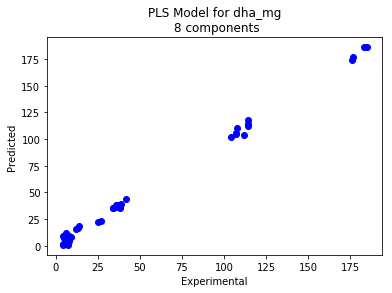

In [391]:
for prop in PROPS:    
    # make PLS model
    Xt, Yt, PLS = pls.make_PLS_from_mdf(low3, prop, 8)
    
    # Check matrix size consistency
    print('''
      Training Data
    --------------------
    X-block  %d by %d
    Y-block  %d by 1
    ''' % (*Xt.shape, Yt.shape[0]))

    pls.test_PLS(PLS, Xt, Yt, title=prop, show_table=True)
    #pls.test_PLS(PLS, Xv, Yv, title='Validation Set', show_table=True)
    
    #save PLS model
    #name =  xmat_name.replace('xmatrix', name)
    #fname = op.join('models', name)
    #pls.save_model(PLS, fname=fname)
    

In [393]:
import pls_new as plsn
for prop in PROPS:    
    # make PLS model
    Xt, Yt, PLS = plsn.make_PLS_from_mdf(low3, prop, 8)
    
    # Check matrix size consistency
    print('''
      Training Data
    --------------------
    X-block  %d by %d
    Y-block  %d by 1
    ''' % (*Xt.shape, Yt.shape[0]))

    plsn.test_PLS(PLS, low3.index, Xt, Yt, title=prop, show_table=True)
    #pls.test_PLS(PLS, Xv, Yv, title='Validation Set', show_table=True)
    
    #save PLS model
    #name =  xmat_name.replace('xmatrix', name)
    #fname = op.join('models', name)
    #pls.save_model(PLS, fname=fname)
    


      Training Data
    --------------------
    X-block  60 by 560
    Y-block  60 by 1
    


TypeError: test_PLS() got multiple values for argument 'title'